In [6]:
import pandas as pd
import pickle

In [7]:
# Parameters
log_name = "('verif Taghleef 2025-08-17_13:42:32',)"
config_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/configs/config.yaml"
start_date = "2025-05-01T00:00:00"
end_date = "2025-05-31T23:00:00"
cliente = "Taghleef"
alias = "TAGHLEEF"
tarifa = "6.1 TD"
cups = "ES0031101457946001KR"
path_load_parquet = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/processed/elec/elec_load.parquet"
path_coberturas_df = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/customers/elec/Taghleef/raw/df_coberturas_1.pkl"
path_master_matrix = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/customers/elec/Taghleef/raw/master_matrix_ES0031101457946001KR.pkl"
path_contract_matrix = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/customers/elec/Taghleef/raw/contract_matrix_ES0031101457946001KR.pkl"
db_elec_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/processed/elec/facturas_elec.db"
template_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/verification_project/elec/templates/Template 2024.xlsx"
invoice_path_pickle = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/outputs/verification_project/verif/Taghleef/raw/2025/06. Junio/Verificaci\xf3n Fra. 20250501_20250531 TAGHLEEF.pkl"
output_verif_excel = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/outputs/verification_project/verif/Taghleef/raw/2025/06. Junio/Verificaci\xf3n Fra. 20250501_20250531 TAGHLEEF.xlsx"
output_verif_pdf = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/outputs/verification_project/verif/Taghleef/pdfs/2025/06. Junio/Verificaci\xf3n Fra. 20250501_20250531 TAGHLEEF.pdf"


In [8]:
from datetime import datetime

# Assuming `start_date` and `end_date` are passed as ISO strings
start_date = datetime.fromisoformat(start_date)
end_date = datetime.fromisoformat(end_date)

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2025-05-01 00:00:00
End Date: 2025-05-31 23:00:00


In [9]:
with open(invoice_path_pickle, "rb") as pickle_file:
    invoice_dict = pickle.load(pickle_file)

df_master = pd.read_pickle(path_master_matrix)
df_coberturas = pd.read_pickle(path_coberturas_df)
df_load = pd.read_parquet(path_load_parquet)
df_contrato = pd.read_pickle(path_contract_matrix)
# apply permite generar varias columnas
# varias funciones base, una funcion por cada forma de comercializar, cada una en un diccionario
# diccionario con todas las formulas 
df_master['contract_index'].unique()
df_master['contract_id'].unique()

array([1])

In [10]:
coste_energia_fra = invoice_dict['coste_energia']
coste_reactiva_fra = invoice_dict['coste_reactiva']
coste_excesos_fra = invoice_dict['excesos_potencia']
base_imponible_fra = invoice_dict['total_bruto_iva']
coste_potencia_fra = invoice_dict['coste_potencia']
num_fra = invoice_dict['num_factura']
potencia_fra = [invoice_dict[f'potencia_p{i+1}'] for i in range (6)]
consumo_fra = [invoice_dict[f'energia_p{i+1}'] / 1000 for i in range (6)]
dto_electrointensivos_fra = invoice_dict['dto_electrointensivo']

if cliente == 'Kem One':
    potencia_fra = [1700, 1700, 1700, 1700, 1700, 2375]

print(f"Power:\n{potencia_fra}")

Power:
[4030.0, 4030.0, 4030.0, 4030.0, 4030.0, 4830.0]


In [11]:
from verification_project.liquidation import Liquidation
from shared.dicts import contract_dict

In [12]:
Liquidation = Liquidation(
                    start_date=start_date,
                    end_date=end_date,
                    df_master=df_master,
                    df_contrato=df_contrato,
                    power_list=potencia_fra,
                    df_load=df_load,
                    df_coberturas=df_coberturas,
                        )

In [13]:
Liquidation.execute(contract_mapping=contract_dict);

In [14]:
df = Liquidation.df_verif

print(f'\n\n\nSimulated power cost: {Liquidation.coste_potencia} €')
print(f'Simulated excess cost: {Liquidation.excesos_potencia} €')
print(f'Simulated energy cost: {Liquidation.coste_energia} €')
print(f'Simulated electrointesivo deduction: {Liquidation.dto_electrointensivos} €')
print(f'Simulated taxable base: {Liquidation.base_imponible} €')


Simulated power cost: 20068.04008605479 €
Simulated excess cost: 0.0 €
Simulated energy cost: 159531.60811353585 €
Simulated electrointesivo deduction: 13298.543110323288 €
Simulated taxable base: 174799.09155932892 €


In [15]:
print(f'Simulated captured commodity price: {Liquidation.captured_commodity_price_w_clicks} €/MWh')

Simulated captured commodity price: 32.04422642944937 €/MWh


In [16]:
print(f'\n\n\nSimulated power cost: {Liquidation.coste_potencia} €')
print(f'Simulated excess cost: {Liquidation.excesos_potencia} €')
print(f'Simulated energy cost: {Liquidation.coste_energia} €')
print(f'Simulated electrointesivo discount: {Liquidation.dto_electrointensivos} €')
print(f'Simulated taxable base: {Liquidation.base_imponible} €')

print(f'Invoice power cost: {coste_potencia_fra} €')
print(f'Invoice excess cost: {coste_excesos_fra} €')
print(f'Invoice energy cost: {coste_energia_fra} €')
print(f'Invoice electricity dependent deduction: {dto_electrointensivos_fra} €')
print(f'Invoice taxable base: {base_imponible_fra} €')



Simulated power cost: 20068.04008605479 €
Simulated excess cost: 0.0 €
Simulated energy cost: 159531.60811353585 €
Simulated electrointesivo discount: 13298.543110323288 €
Simulated taxable base: 174799.09155932892 €
Invoice power cost: 20068.05 €
Invoice excess cost: 0.0 €
Invoice energy cost: 163046.5 €
Invoice electricity dependent deduction: 0.0 €
Invoice taxable base: 192553.63 €


In [17]:
print(f'Avoided solar captured price: {Liquidation.solar_avoided_price} €/MWh')

Avoided solar captured price: 65.84317490077603 €/MWh


Axes(0.125,0.11;0.775x0.77)


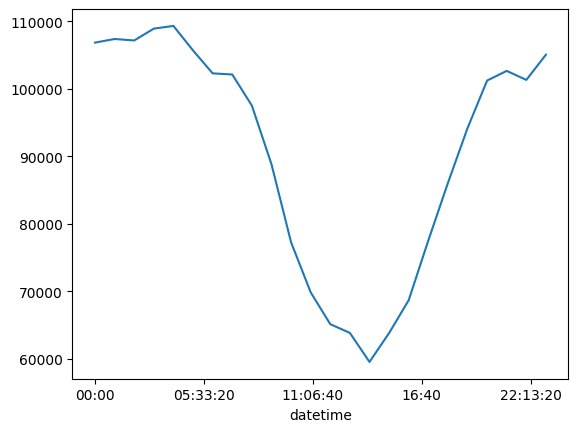

In [18]:
print(df.groupby(df['datetime'].dt.time)['load'].sum().plot())

In [19]:
load_period = df.groupby('periodo')['load'].sum() / 1000
load_values_dict = load_period.to_dict()

consumo_ver = [load_values_dict.get(period, 0) for period in range(1,7)]

print(f'Energy consumption {sum(consumo_ver)} MWh')
print(f'Energy consumption per period in MWh: {(consumo_ver)}')  # Output: [0, 0, 135300.0, 104462.0, 0, 188058.0]


Energy consumption 2172.163 MWh
Energy consumption per period in MWh: [0, 0, 0, 498.384, 381.49, 1292.289]


In [20]:
from shared.dicts import ver_mapping
import utils.utils_dates as utils_dates

In [21]:
dict_ver = {
    "cliente" : cliente,
    "alias" : alias,
    "cups" : cups,
    "tarifa" : tarifa,
    "periodo" : f'{start_date.strftime("%d-%m-%Y")} - {end_date.strftime("%d-%m-%Y")}',
    "num_factura" : num_fra,
    "consumo_fra" : consumo_fra,
    "energia_fra" : coste_energia_fra,
    "potencia_fra" : coste_potencia_fra,
    "excesos_fra" : coste_excesos_fra,
    "reactiva_fra" : coste_reactiva_fra,
    "dto_electrointensivos_fra" : dto_electrointensivos_fra,
    "base_imponible_fra" : base_imponible_fra,
    "potencia_contratada" : potencia_fra,
    "consumo_ver" : consumo_ver,
    "potencia_ver" : Liquidation.coste_potencia,
    "energia_ver" : Liquidation.coste_energia,
    "excesos_ver" : Liquidation.excesos_potencia,
    "reactiva_ver" : coste_reactiva_fra,
    "dto_electrointensivos_ver" : - Liquidation.dto_electrointensivos,
    "base_imponible_ver" : Liquidation.base_imponible + coste_reactiva_fra,
    # "days" : utils_dates.days_in_month(year=year, month=month)
    }
print(dict_ver)

{'cliente': 'Taghleef', 'alias': 'TAGHLEEF', 'cups': 'ES0031101457946001KR', 'tarifa': '6.1 TD', 'periodo': '01-05-2025 - 31-05-2025', 'num_factura': 'PI25142000204445, PA25142000020232', 'consumo_fra': [0.0, 0.0, 0.0, 498.384, 381.49, 1292.289], 'energia_fra': 163046.5, 'potencia_fra': 20068.05, 'excesos_fra': 0.0, 'reactiva_fra': 0.0, 'dto_electrointensivos_fra': 0.0, 'base_imponible_fra': 192553.63, 'potencia_contratada': [4030.0, 4030.0, 4030.0, 4030.0, 4030.0, 4830.0], 'consumo_ver': [0, 0, 0, 498.384, 381.49, 1292.289], 'potencia_ver': np.float64(20068.04008605479), 'energia_ver': np.float64(159531.60811353585), 'excesos_ver': np.float64(0.0), 'reactiva_ver': 0.0, 'dto_electrointensivos_ver': np.float64(-13298.543110323288), 'base_imponible_ver': np.float64(174799.09155932892)}


In [18]:
from openpyxl import load_workbook

# Load the Excel template
wb = load_workbook(template_path)

# Loop through cell mapping and populate cells in the appropriate sheets
for key, (sheet_name, start_cell) in ver_mapping.items():
    if key in dict_ver:
        ws = wb[sheet_name]  # Select the correct sheet
        value = dict_ver[key]

        # If the value is a DataFrame, write it starting from the specified cell
        if isinstance(value, pd.DataFrame):
            start_column = start_cell[0]  # Get the starting column letter
            start_row = int(start_cell[1:])  # Get the starting row number
            
            for col_index, column in enumerate(value.columns):
                for row_index, item in enumerate(value[column]):
                    cell = f"{chr(ord(start_column) + col_index)}{start_row + row_index}"
                    ws[cell] = item

        # Handle fixed-length lists (e.g., consumo_fra and potencia_contratada)
        elif isinstance(value, list):
            column = ''.join(filter(str.isalpha, start_cell))  # Extract column (e.g., "A")
            row = int(''.join(filter(str.isdigit, start_cell)))  # Extract row number (e.g., 2)

            # Write each item in the list to consecutive cells
            for i in range(6):
                cell_address = f"{column}{row + i}"
                ws[cell_address] = value[i] if i < len(value) else None
        else:
            ws[start_cell] = value

# Save the updated workbook to a new file
wb.save(output_verif_excel)

Data has been saved to c:\Users\mikel.perez\0_Python_Projects - copia\0_Python_projects_v2\outputs\verification_project\verif\PR\raw\2024\12. Diciembre\Verificación Fra. 20241101_20241130 TIVOLI.xlsx with the original formatting intact.


In [19]:
from utils.utils_var import export_excel_range_to_pdf

excel_file = output_verif_excel
output_pdf = output_verif_pdf
sheet = "Ficha"
cell_range = "B1:I61"

export_excel_range_to_pdf(excel_file, output_verif_pdf, sheet, cell_range)


Exported range B1:I61 from Ficha to c:\Users\mikel.perez\0_Python_Projects - copia\0_Python_projects_v2\outputs\verification_project\verif\PR\pdfs\2024\12. Diciembre\Verificación Fra. 20241101_20241130 TIVOLI.pdf
